In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [4]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.dropna(subset=['Order ID', 'Order Date'], inplace=True)

In [7]:
# Fill missing postal codes with 0 or 'Unknown'
df['Postal Code'] = df['Postal Code'].fillna(0)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [9]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Month_Year'] = df['Order Date'].dt.to_period('M')

In [10]:
print(df.head())

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR

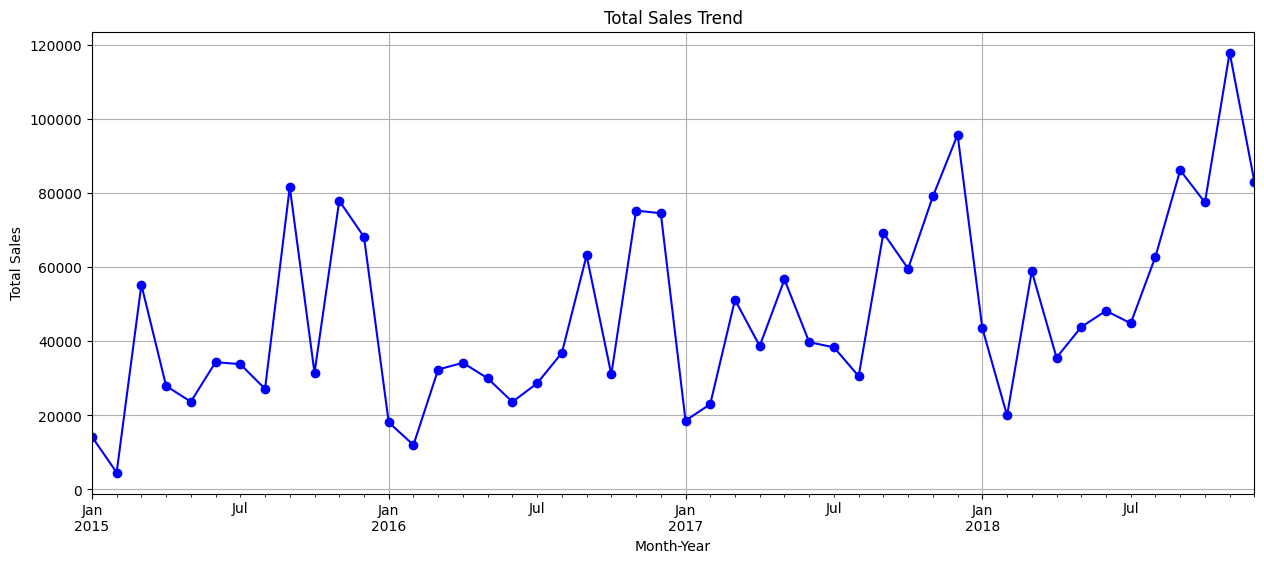

In [11]:
# grouping data by month-year to see the trend
sales_trend = df.groupby('Month_Year')['Sales'].sum()

plt.figure(figsize=(15,6)) # wide graph
sales_trend.plot(kind='line', marker='o', color='b')
plt.title('Total Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month', 'Year', 'Month_Year'],
      dtype='object')


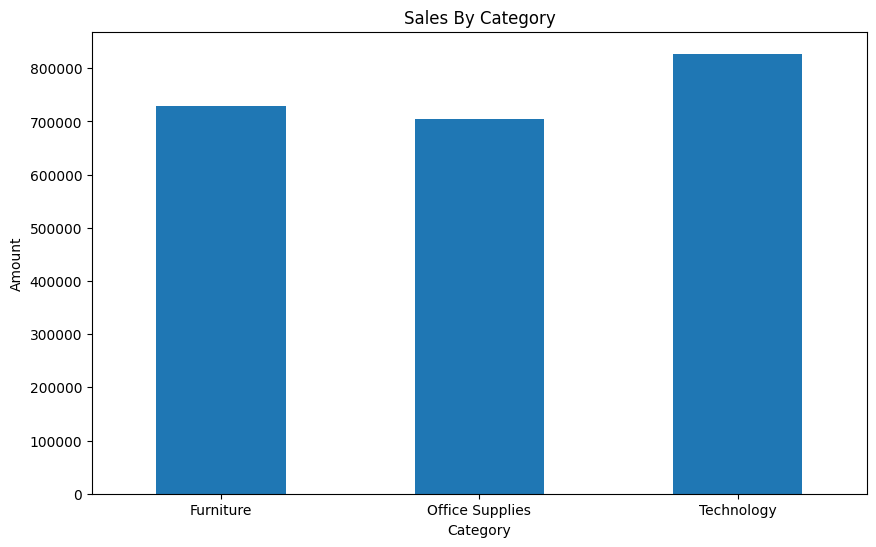

In [12]:
print(df.columns)
df.columns = df.columns.str.strip()
category_analysis = df.groupby('Category')['Sales'].sum()
category_analysis.plot(kind='bar', figsize=(10,6))
plt.title('Sales By Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

In [13]:
latest_date = df['Order Date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({'Order Date': lambda x: (latest_date - x.max()).days, 'Order ID':'count', 'Sales':'sum'})
rfm.rename(columns={'Order Date':'Recency', 'Order ID':'Frequency','Sales':'Monetary'}, inplace=True)
print(rfm.head())


             Recency  Frequency  Monetary
Customer ID                              
AA-10315         185         11  5563.560
AA-10375          20         15  1056.390
AA-10480         260         12  1790.512
AA-10645          56         18  5086.935
AB-10015         416          6   886.156


In [14]:
top_spenders = rfm.sort_values(by='Monetary', ascending=False).head(5)
frequent_buyers = rfm.sort_values(by='Frequency', ascending=False).head(10)
print("TOP SPENDERS")
print(top_spenders)
print("\n FREQUENT BUYERS")
print(frequent_buyers)


TOP SPENDERS
             Recency  Frequency   Monetary
Customer ID                               
SM-20320          80         15  25043.050
TC-20980         400         12  19052.218
RB-19360          97         18  15117.339
TA-21385          70         10  14595.620
AB-10105          42         20  14473.571

 FREQUENT BUYERS
             Recency  Frequency    Monetary
Customer ID                                
WB-21850          21         35   6129.7100
PP-18955          98         34   7252.6080
MA-17560          65         34   4299.1610
JL-15835          22         33   9576.3430
SV-20365         102         32  11470.9500
JD-15895         395         32   7610.8640
CK-12205          40         32   3154.8550
AP-10915          99         31   3323.5560
ZC-21910          55         31   8025.7070
EP-13915          13         31   5478.0608


In [15]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')
daily_sales['Day_Count'] = (daily_sales['Order Date'] - daily_sales['Order Date'].min()).dt.days
print(daily_sales.head(10))

  Order Date     Sales  Day_Count
0 2015-01-03    16.448          0
1 2015-01-04   288.060          1
2 2015-01-05    19.536          2
3 2015-01-06  4407.100          3
4 2015-01-07    87.158          4
5 2015-01-09    40.544          6
6 2015-01-10    54.830          7
7 2015-01-11     9.940          8
8 2015-01-13  3553.795         10
9 2015-01-14    61.960         11


In [16]:
x = daily_sales[['Day_Count']]
y = daily_sales['Sales']

split_index = int(len(daily_sales)*0.8)

x_train = x.iloc[:split_index]
y_train = y.iloc[:split_index]

x_test = x.iloc[split_index:]
y_test = y.iloc[split_index:]

print(f"Training on {len(x_train)} days, Testing on {len(x_test)} days.")

Training on 984 days, Testing on 246 days.


In [17]:
model = LinearRegression()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("Model Training Complete.")

Model Training Complete.


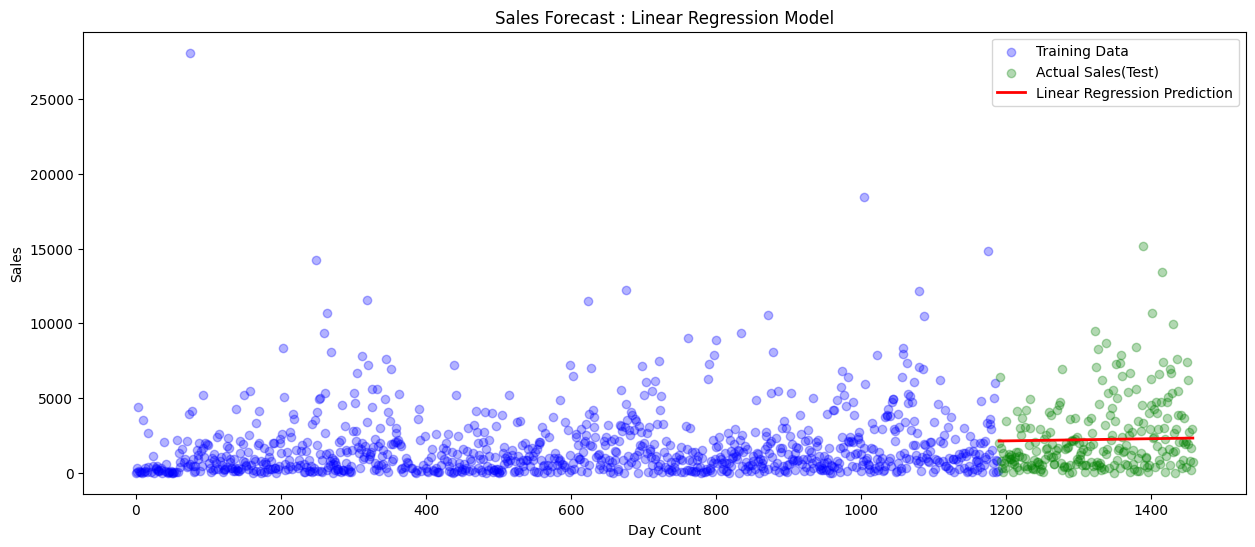

In [18]:
plt.figure(figsize=(15,6))
plt.scatter(x_train, y_train, color='blue', alpha=0.3, label='Training Data')
plt.scatter(x_test, y_test, color='green', alpha=0.3, label='Actual Sales(Test)')
plt.plot(x_test, predictions, color='red', linewidth=2, label='Linear Regression Prediction')

plt.title('Sales Forecast : Linear Regression Model')
plt.xlabel('Day Count')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [19]:
daily_sales['Month'] = daily_sales['Order Date'].dt.month
daily_sales['Year'] = daily_sales['Order Date'].dt.year
daily_sales['Day_Of_Week'] = daily_sales['Order Date'].dt.dayofweek

x_advanced = daily_sales[['Day_Count', 'Month', 'Year', 'Day_Of_Week']]
y_advanced = daily_sales['Sales']

split_index = int(len(daily_sales)*0.8)

x_train_adv = x_advanced.iloc[:split_index]
y_train_adv = y_advanced.iloc[:split_index]

x_test_adv = x_advanced.iloc[split_index:]
y_test_adv = y_advanced.iloc[split_index:]

print("Month, Year, Day of Week")

Month, Year, Day of Week


In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train_adv, y_train_adv)

rf_predictions = rf_model.predict(x_test_adv)

print("Model Trained")

Model Trained


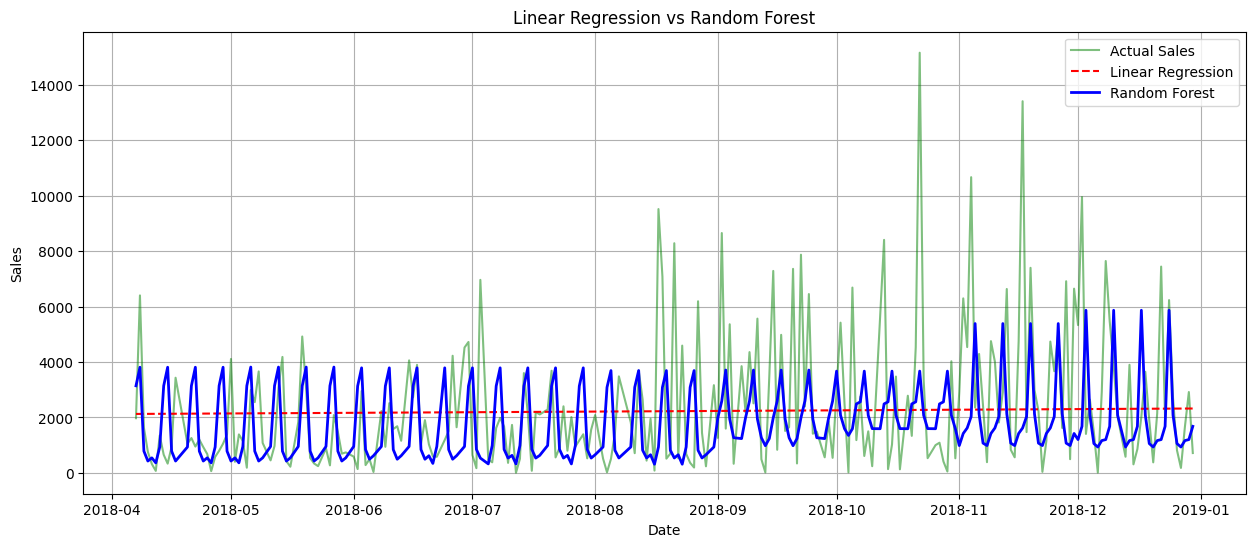

Random Forest R-squared : -0.16


In [21]:
plt.figure(figsize=(15,6))

plt.plot(daily_sales['Order Date'].iloc[split_index:], y_test_adv, label='Actual Sales', color='green', alpha=0.5)
plt.plot(daily_sales['Order Date'].iloc[split_index:], predictions, label='Linear Regression', color='red', linestyle='--')
plt.plot(daily_sales['Order Date'].iloc[split_index:], rf_predictions, label='Random Forest', color='blue', linewidth='2')

plt.title("Linear Regression vs Random Forest")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print(f"Random Forest R-squared : {r2_score(y_test_adv, rf_predictions):.2f}")

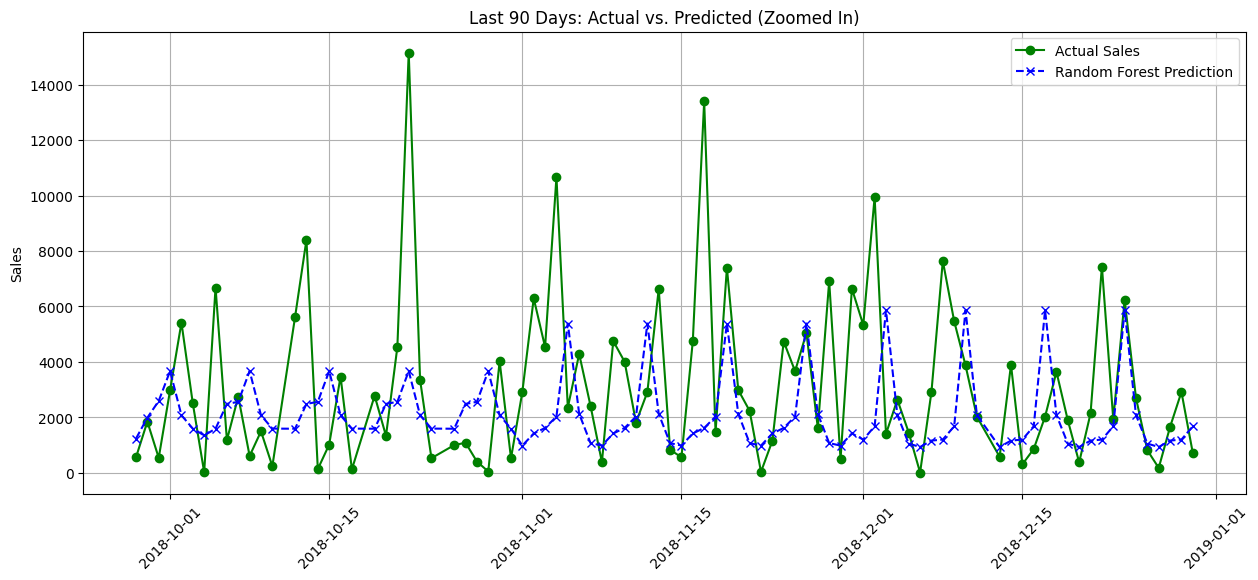

In [22]:
last_90_days = daily_sales.iloc[-90:]
x_test_90 = x_test_adv.iloc[-90:]
y_test_90 = y_test_adv.iloc[-90:]

rf_pred_90 = rf_model.predict(x_test_90)

plt.figure(figsize=(15, 6))
plt.plot(last_90_days['Order Date'], y_test_90, label='Actual Sales', color='green', marker='o')
plt.plot(last_90_days['Order Date'], rf_pred_90, label='Random Forest Prediction', color='blue', linestyle='--', marker='x')

plt.title('Last 90 Days: Actual vs. Predicted (Zoomed In)')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

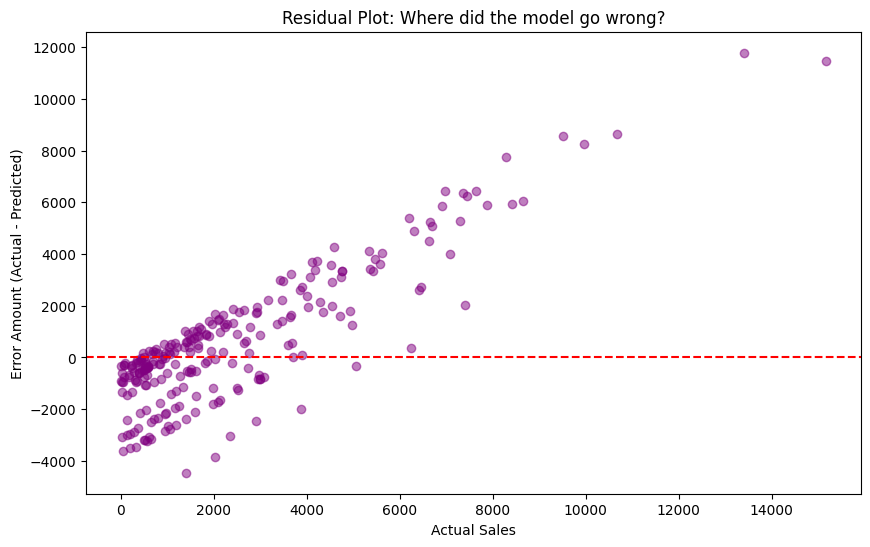

In [23]:
# Calculate the errors (Residuals)
residuals = y_test_adv - rf_predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test_adv, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--') # The "Perfect Prediction" line

plt.title('Residual Plot: Where did the model go wrong?')
plt.xlabel('Actual Sales')
plt.ylabel('Error Amount (Actual - Predicted)')
plt.show()

In [24]:
# Create the Lag Features
daily_sales['Lag_1'] = daily_sales['Sales'].shift(1)
daily_sales['Lag_7'] = daily_sales['Sales'].shift(7)
daily_sales['Rolling_Mean_7'] = daily_sales['Sales'].rolling(window=7).mean()

# IMPORTANT: The first 7 days will now have 'NaN' (Empty) values
# because they don't have 7 days of history. We MUST drop them.
daily_sales.dropna(inplace=True)

# Let's see what the data looks like now
print(daily_sales[['Order Date', 'Sales', 'Lag_1', 'Lag_7']].head(10))

   Order Date     Sales     Lag_1     Lag_7
7  2015-01-11     9.940    54.830    16.448
8  2015-01-13  3553.795     9.940   288.060
9  2015-01-14    61.960  3553.795    19.536
10 2015-01-15   149.950    61.960  4407.100
11 2015-01-16   299.964   149.950    87.158
12 2015-01-18    64.864   299.964    40.544
13 2015-01-19   378.594    64.864    54.830
14 2015-01-20  2673.870   378.594     9.940
15 2015-01-23    40.080  2673.870  3553.795
16 2015-01-26  1097.250    40.080    61.960


In [25]:
# 1. Update Features (X) to include the new Lag columns
# We keep Month, Year, DayOfWeek, and add the Lags
features = ['Day_Count', 'Month', 'Year', 'Day_Of_Week', 'Lag_1', 'Lag_7', 'Rolling_Mean_7']

X_lag = daily_sales[features]
y_lag = daily_sales['Sales']

# 2. Split the data again (Time-based split)
split_index = int(len(daily_sales) * 0.8)

X_train_lag = X_lag.iloc[:split_index]
y_train_lag = y_lag.iloc[:split_index]

X_test_lag = X_lag.iloc[split_index:]
y_test_lag = y_lag.iloc[split_index:]

# 3. Train the Random Forest
rf_model_lag = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lag.fit(X_train_lag, y_train_lag)

# 4. Predict
predictions_lag = rf_model_lag.predict(X_test_lag)

print("Model Retrained with Lag Features.")

Model Retrained with Lag Features.


In [26]:
old_score = r2_score(y_test_adv, rf_predictions) # The previous Random Forest score
new_score = r2_score(y_test_lag, predictions_lag) # The new "Lag" score

print(f"Old Score (No Lags): {old_score:.4f}")
print(f"New Score (With Lags): {new_score:.4f}")

if new_score > old_score:
    print("The model improved!")
else:
    print("Hmm, no improvement. We might need tuning.")

Old Score (No Lags): -0.1605
New Score (With Lags): 0.0550
The model improved!


C:\Users\navee\AppData\Local\Temp\ipykernel_13152\776381932.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


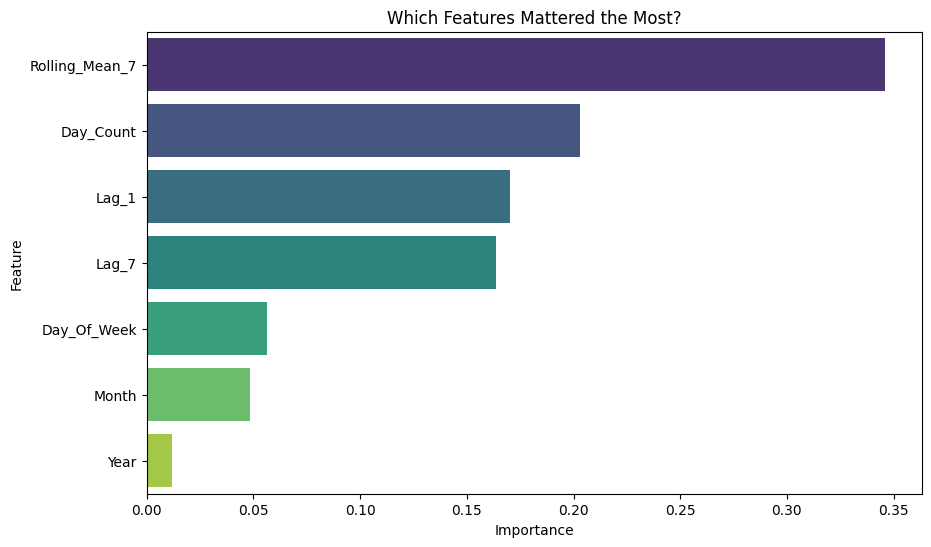

In [27]:
importances = rf_model_lag.feature_importances_

# Create a DataFrame to make it easy to plot
feature_importance_df = pd.DataFrame({'Feature': features,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Features Mattered the Most?')
plt.show()